# Sentiment Analysis
<ul>
    <li>Author: Samuel D'Avila</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk import FreqDist

import ReferenceArchitecture as rf
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data & Viewing the dataframes

In [2]:
df_comments = pd.read_csv("ScrapedComments.csv")
df_titles = pd.read_csv("ScrapedTitles.csv")

df_titles_top100 = pd.read_csv("Top100ScrapedTitles.csv")

df_combined_top100 = pd.read_csv("CombinedTop100Scrape.csv")

In [3]:
df_comments.head(3)

,Unnamed: 0,ID,User,Body,Comment Score
0,0,sgcach,AutoModerator,Welcome to /r/dating_advice!\n\nPlease keep th...,1
1,1,sgcach,fake-august,No one is busier than someone who is not inter...,3037
2,2,sgcach,Jammer250,"Dating should be effortless, yes, but a succes...",777


In [6]:
df_titles.head(3)

,Unnamed: 0,Title,Post Text,ID,Score,Total Comments,Post URL
0,0,"When someone really likes you, it’s effortless.",Just keep this in mind. They text you right aw...,sgcach,11302,508,https://www.reddit.com/r/dating_advice/comment...
1,1,My father told me this,\n\nMy father told me this when he walked up...,sseson,8905,256,https://www.reddit.com/r/dating_advice/comment...
2,2,He said yes! I'm finally got the first date of...,"UPDATE: Oh my god, I can't believe how many co...",sdvk7s,8482,504,https://www.reddit.com/r/dating_advice/comment...


In [7]:
df_titles_top100.head(3)

,Unnamed: 0,Title,Post Text,ID,Title Score,Total Comments,Post URL
0,0,"When someone really likes you, it’s effortless.",Just keep this in mind. They text you right aw...,sgcach,11302,508,https://www.reddit.com/r/dating_advice/comment...
1,1,My father told me this,\n\nMy father told me this when he walked up...,sseson,8905,256,https://www.reddit.com/r/dating_advice/comment...
2,2,He said yes! I'm finally got the first date of...,"UPDATE: Oh my god, I can't believe how many co...",sdvk7s,8482,504,https://www.reddit.com/r/dating_advice/comment...


In [8]:
df_combined_top100.head(3)

,Unnamed: 0,Title,Post Text,ID,Title Score,Total Comments,Post URL,User,Body,Comment Score
0,0,"When someone really likes you, it’s effortless.",Just keep this in mind. They text you right aw...,sgcach,11302,508,https://www.reddit.com/r/dating_advice/comment...,AutoModerator,Welcome to /r/dating_advice!\n\nPlease keep th...,1
1,1,"When someone really likes you, it’s effortless.",Just keep this in mind. They text you right aw...,sgcach,11302,508,https://www.reddit.com/r/dating_advice/comment...,fake-august,No one is busier than someone who is not inter...,3037
2,2,"When someone really likes you, it’s effortless.",Just keep this in mind. They text you right aw...,sgcach,11302,508,https://www.reddit.com/r/dating_advice/comment...,Jammer250,"Dating should be effortless, yes, but a succes...",777


### Parsing the data and removing stopwords

In [3]:
# Function to remove punctuation
def punctuation_extermination(s):
    o = str.maketrans('', '', string.punctuation)
    return str(s).translate(o)

# Removing punctation from the dataframes
df_comments["Body"] = df_comments["Body"].apply(punctuation_extermination)

df_titles['Title'] = df_titles['Title'].apply(punctuation_extermination)
df_titles_top100['Title'] = df_titles_top100['Title'].apply(punctuation_extermination)

df_combined_top100['Title'] = df_combined_top100['Title'].apply(punctuation_extermination)
df_combined_top100['Body'] = df_combined_top100['Body'].apply(punctuation_extermination)

In [4]:
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for word in text_col:
        corpus += word
    return corpus

In [5]:
# Building the corpus
corpus_comments = build_corpus(df_comments["Body"])

corpus_titles = build_corpus(df_titles['Title'])
corpus_titles_top100 = build_corpus(df_titles_top100["Title"])

corpus_combined_top100 = build_corpus(df_combined_top100['Title'])
corpus_combined_top100 = build_corpus(df_combined_top100['Body'])

# Converting all the words into lowercase and spliting the corpus
    # Lowering case
corpus_comments = corpus_comments.lower()

corpus_titles = corpus_titles.lower()
corpus_titles_top100 = corpus_titles_top100.lower()

corpus_combined_top100 = corpus_combined_top100.lower()

    # Splitting
corpus_comments = corpus_comments.split()

corpus_titles = corpus_titles.split()
corpus_titles_top100 = corpus_titles_top100.split()

corpus_combined_top100 = corpus_combined_top100.split()

In [6]:
# Removing stropwords from corpus

corpus_comments_NoStop = [word for word in corpus_comments if word not in stopwords.words("english")]

corpus_titles_NoStop = [word for word in corpus_titles if word not in stopwords.words("english")]
corpus_titles_top100_NoStop = [word for word in corpus_titles_top100 if word not in stopwords.words("english")]

corpus_combined_top100_NoStop = [word for word in corpus_combined_top100 if word not in stopwords.words("english")]

<AxesSubplot:title={'center':'Most Frequent Words in theComments- Excluding STOPWORDS'}, xlabel='Word', ylabel='Count'>

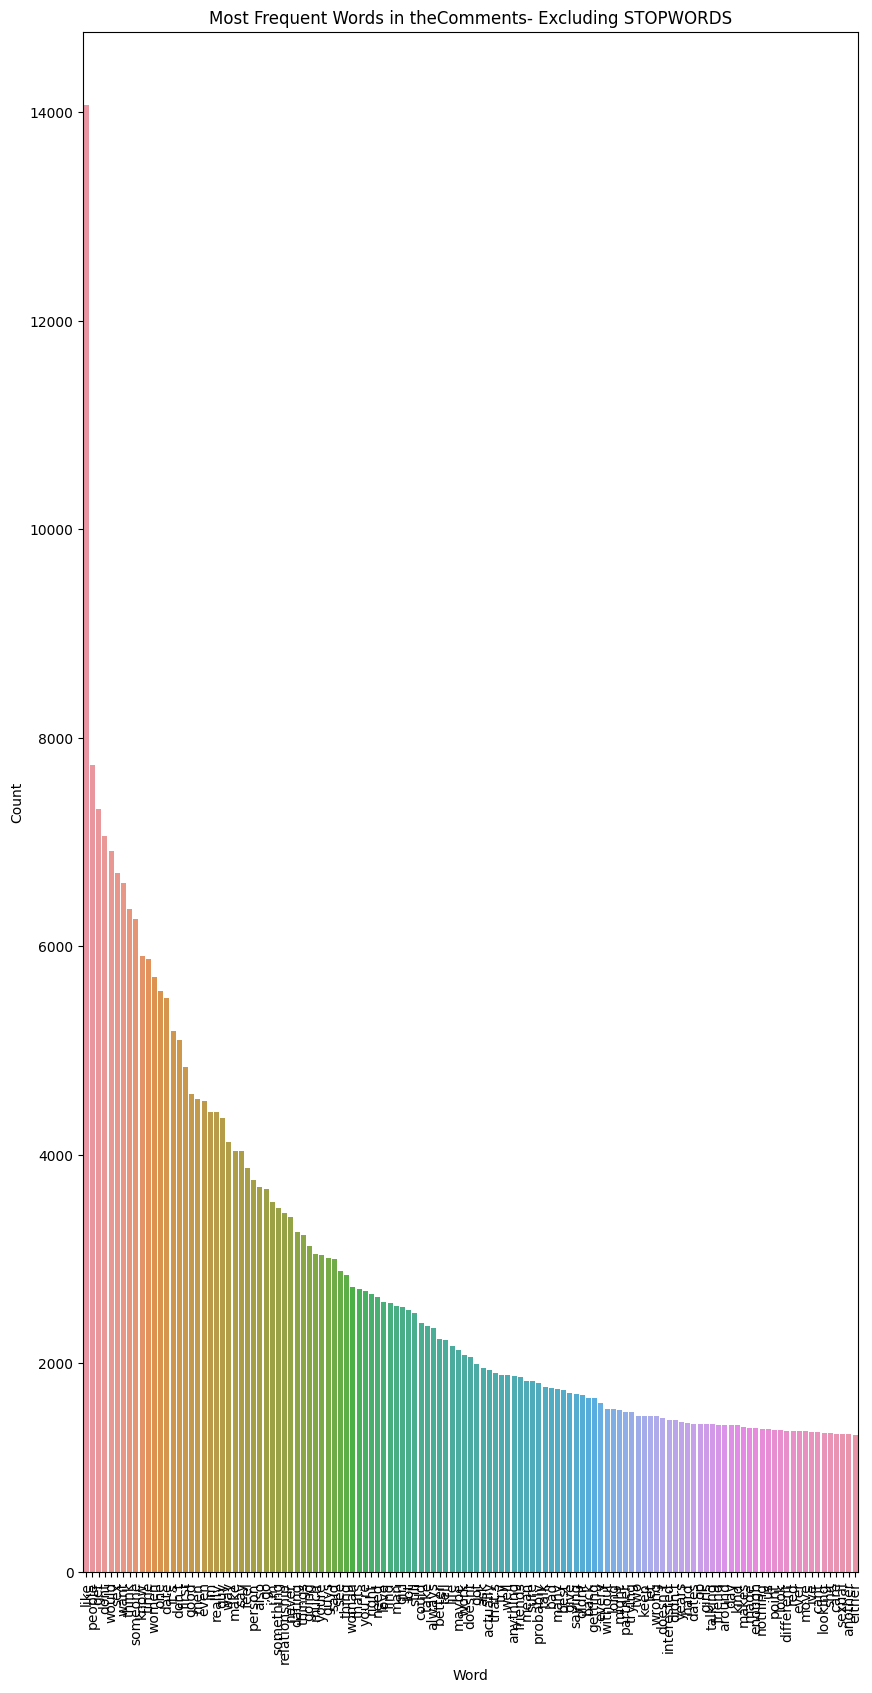

In [7]:
rf.plot_word_frequency(corpus_comments_NoStop, corpus_name="Comments")